## 2022 Predict Ideology of Media Organizations from Tweets

In [24]:
from fastai.text.all import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
from ideology_utils import *

### Download Unlimited Tweets using Unofficial Twitter API

Twitter handles for a selected **group** were copied and pasted into a csv `handles_group.csv` file manually from here: https://www.4icu.org/twitter/us/

Used `node index.js handles_group.csv 500`
This should be done in mamba environment containing `npm` and `nodejs`. The program itself is `index.js`. All of this is located in `twitterAPI` and is available from github: https://github.com/colindaniels/twitterAPI

To load these tweeets, reference the directory that then contains `json` files for each member of the group.m

In [30]:
group = 'tweets/tweets-media-2022-06-25-500/' # 500 tweets

### Download Tweets using Official Twitter API (faster, but limited to past week and subject to rate limits) 

In [2]:
#group = get_tweets_of_group("handles_media.csv", "media")

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

### Ideology Score of Media Organizations

In [28]:
trainer,tokz = load_tfms_model('blue-or-red-roberta-2022')

loading configuration file blue-or-red-roberta-2022/config.json
Model config RobertaConfig {
  "_name_or_path": "blue-or-red-roberta-2022",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.19.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file blue-or-red-roberta-2022/pytorch_model.bin
All model checkpoint weights were used when initializing Rober

In [31]:
scores_tfms = scores_of_group_tfms(group, [trainer,tokz])

['theblaze', 0.73, 0.72, 500]
['nypost', 0.63, 0.62, 500]
['voxdotcom', 0.33, 0.34, 500]
['TheAtlantic', 0.46, 0.46, 500]
['npr', 0.28, 0.3, 500]
['washingtonpost', 0.37, 0.37, 500]
['politico', 0.44, 0.43, 500]
['DailyCaller', 0.79, 0.77, 500]
['nytimes', 0.31, 0.34, 500]
['MSNBC', 0.31, 0.31, 500]
['AddInfoOrg', 0.45, 0.45, 500]
['redstate', 0.75, 0.74, 500]
['AP', 0.39, 0.39, 500]
['HuffPost', 0.37, 0.38, 500]
['Reuters', 0.6, 0.59, 500]
['BreitbartNews', 0.75, 0.74, 500]
['NBCNews', 0.38, 0.39, 500]
['Slate', 0.5, 0.47, 500]
['OccupyDemocrats', 0.27, 0.27, 500]
['BBC', 0.21, 0.24, 500]
['ABC', 0.44, 0.44, 500]
['wsj', 0.56, 0.56, 500]
['TheEconomist', 0.58, 0.57, 500]
['cnn', 0.41, 0.41, 500]
['nro', 0.73, 0.72, 500]
['guardian', 0.47, 0.46, 500]
['TheFiscalTimes', 0.69, 0.67, 500]
['foxnews', 0.7, 0.7, 500]


In [32]:
df = scores2df(scores_tfms,'s1')

#### 0 is progressive, 1 is conservative

<AxesSubplot:ylabel='handle'>

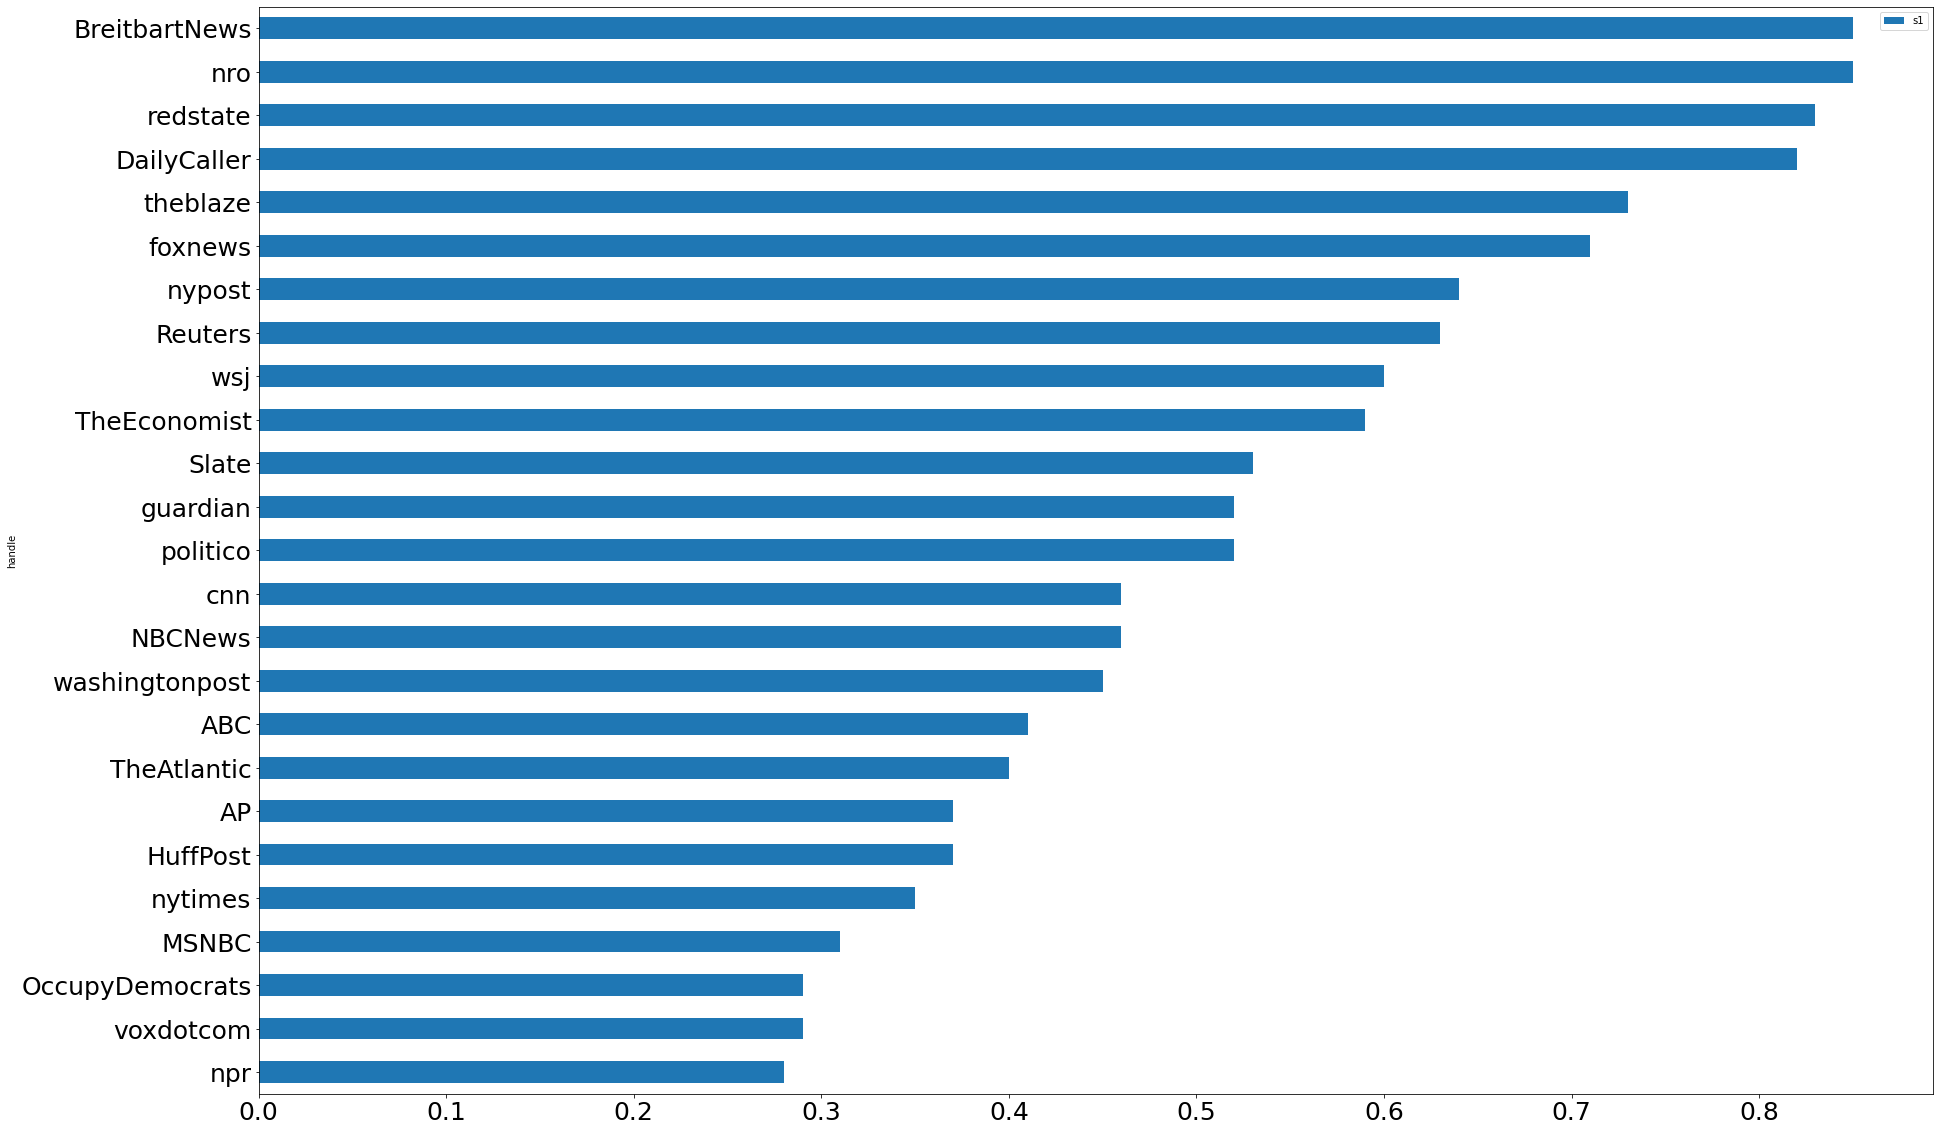

In [23]:
df.plot.barh(y='s1',x='handle',figsize=(30,20),fontsize=25)